In [ ]:
# Name : Sayyed Mudassar Iqbal Shakil Ahmed
# Batch : DSG2404
# Subject : Medical Cost PI Practice Project Solution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Loading our dataset

In [7]:
medical_dataset = pd.read_csv("medical_cost_insurance.csv")
medical_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
medical_dataset.shape

(1338, 7)

In [9]:
#Checking for missing values
medical_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
#No missing values hence we are good to go!

In [11]:
medical_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Analysis 

<Figure size 600x600 with 0 Axes>

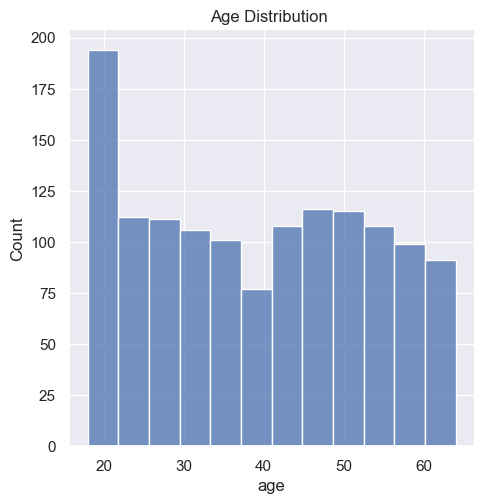

In [12]:
#Distribution of Age 
sns.set()
plt.figure(figsize=(6,6))
sns.displot(medical_dataset['age'])
plt.title('Age Distribution ')
plt.show()

In [13]:
#Shows that we have more younger folks here

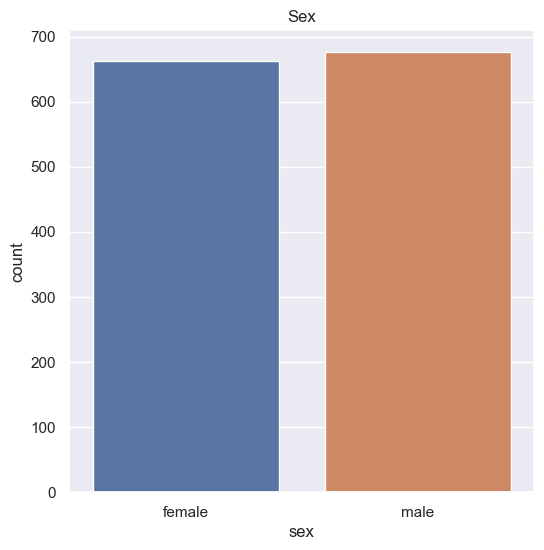

In [14]:
#CHecking Gender Distribution
sns.set() 
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=medical_dataset)
plt.title('Sex')
plt.show()

In [15]:
#Seems like we have equal amount of gender data.

In [16]:
#Lets check if gender has any relation with premium

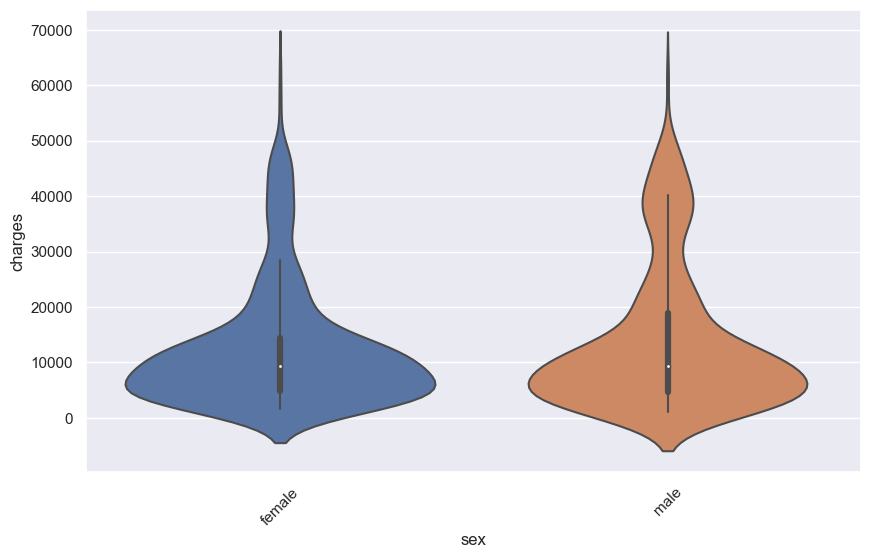

In [26]:
plt.figure(figsize=(10,6))
sns.violinplot(x='sex', y='charges',data=medical_dataset,showmeans=True,xlabel='Sex',ylabel='Charges')
plt.xticks(rotation=45)
plt.show()

In [27]:
#cant conclude as the distribution appears almost same

In [28]:
#Lets check no of childrens

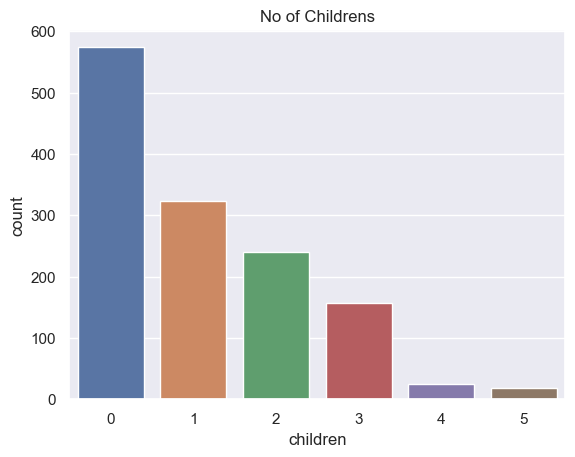

In [29]:
sns.set()
sns.countplot(x='children',data=medical_dataset)
plt.title('No of Childrens')
plt.show()

In [30]:
#Many dont seem to have even a single kid in our data.

In [31]:
#Lets check smokers 

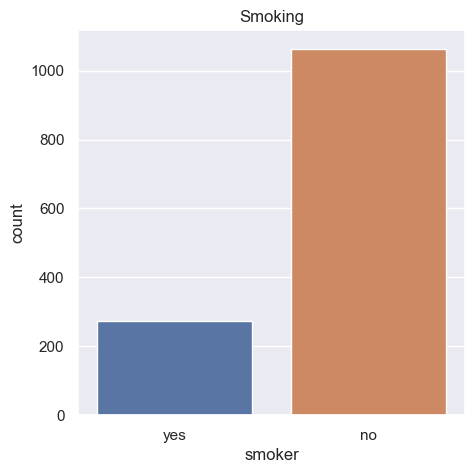

In [32]:
sns.set()
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=medical_dataset)
plt.title('Smoking')
plt.show()

In [33]:
#its good that there appears less no of smokers

In [34]:
#Lets check from which region people have applied most.

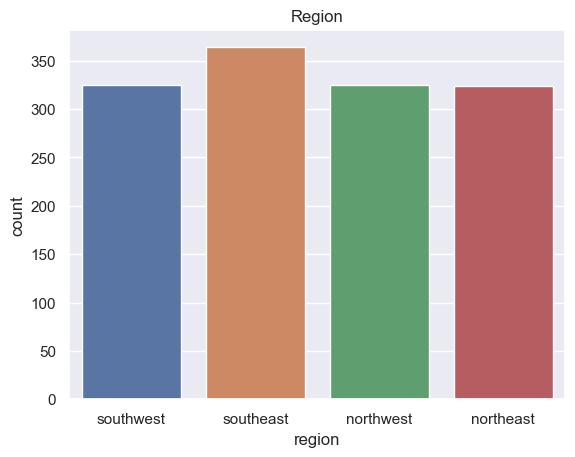

In [35]:
sns.set()
sns.countplot(x='region',data=medical_dataset)
plt.title('Region')
plt.show()

In [36]:
#People from southeast are more health concious it seems.

# Data Preprocessing

In [37]:
#encoding the columns to make them workable features
# Gender column 
medical_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

# smoker columsn

medical_dataset.replace({'smoker':{'yes':0,'no': 1}},inplace=True)

# for the region column

medical_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

# Defining Features & Target  

In [38]:
X = medical_dataset.drop(columns='charges',axis=1)
Y  = medical_dataset['charges']

In [39]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [40]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Train Test Split

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=9)

# Preparing the model

In [42]:
# loading the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

# Evaluation

In [43]:
training_data_prediction = regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print(r2_train)

0.7474522033475719


In [44]:
# prediciting the test data
test_data_predicition = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test,test_data_predicition)

In [45]:
print(r2_test)

0.7600335668647378


# Check the model

In [56]:
import joblib
import numpy as np

#'regressor' is our trained model, HENCE SAVING IT
joblib.dump(regressor, 'insurance_cost_model.joblib')

['insurance_cost_model.joblib']

In [57]:
import joblib
import numpy as np

# Loading the model from the file
regressor = joblib.load('insurance_cost_model.joblib')

# Taking user input
age = float(input("Enter age: "))
sex = float(input("Enter sex (M=0/F=1): "))
bmi = float(input("Enter BMI: "))
children = int(input("Enter number of children: "))
smoker = int(input("Smoker (Yes=0/No=1): ").strip().lower())
region = int(input("Region (southeast=0/southwest=1/northeast=2/northwest=3): ").strip().lower())

# Combining inputs into a single array
input_data = [age, sex, bmi, children, smoker, region]
input_data_as_array = np.asarray(input_data).reshape(1, -1)

# Making a prediction
prediction = regressor.predict(input_data_as_array)
print("The predicted insurance cost is:", prediction[0])


Enter age: 22
Enter sex (M=0/F=1): 0
Enter BMI: 30
Enter number of children: 0
Smoker (Yes=0/No=1): 1
Region (southeast=0/southwest=1/northeast=2/northwest=3): 3
The predicted insurance cost is: 3656.3445840342392


# THE END